## 1.Import modules, open .tar file, read the csv into pandas dataframe

In [1]:
#import module
import os
import numpy
import re
import glob
import pandas as pd
import tarfile
import datetime
from tqdm import tqdm
from IPython.display import display
import matplotlib

import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.options.display.max_rows = None


In [2]:
#open tar file
tarfile = tarfile.open('adventure_works_purchase_orders.tar.gz')
tarfile.extractall() # specify which folder to extract to
tarfile.close()

In [3]:
#read_csv into dataframe
df_sales_data = pd.read_csv('adventure_works_purchase_orders.csv')
df_sales_data.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.0944,3374.99,0.0,1,51.3415
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.1544,3399.99,0.0,1,51.3415
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.1544,3399.99,0.0,1,51.3415


## 2. Check the shape of the dataframe and number of Null values and data types in the columns

In [4]:
# Check the number of cells with Null
df_sales_data.isnull().sum(axis = 0)

SalesOrderNumber        0
OrderDate               0
DueDate                 0
ShipDate                0
Sales_Person            0
Sales_Region            0
Sales_Province          0
Sales_City              0
Sales_Postal_Code       0
Customer_Code           0
Customer_Name           0
Customer_Region         0
Customer_Province       0
Customer_City           0
Customer_Postal_Code    0
LineItem_Id             0
Product_Category        0
Product_Sub_Category    0
Product_Name            0
Product_Code            0
Unit_Cost               0
UnitPrice               0
UnitPriceDiscount       0
OrderQty                0
Unit_Freight_Cost       0
dtype: int64

In [5]:
#shape of df
df_sales_data.shape

(41884, 25)

In [6]:
# check the data types of columns
df_sales_data.dtypes

SalesOrderNumber         object
OrderDate                object
DueDate                  object
ShipDate                 object
Sales_Person             object
Sales_Region             object
Sales_Province           object
Sales_City               object
Sales_Postal_Code         int64
Customer_Code            object
Customer_Name            object
Customer_Region          object
Customer_Province        object
Customer_City            object
Customer_Postal_Code     object
LineItem_Id               int64
Product_Category         object
Product_Sub_Category     object
Product_Name             object
Product_Code             object
Unit_Cost               float64
UnitPrice               float64
UnitPriceDiscount       float64
OrderQty                  int64
Unit_Freight_Cost       float64
dtype: object

## 3. Convert order_date field to datetime, create new feild for months and years, drop the  rows with the date 31-03-2008 for the consistency

In [7]:
#convert type of date field to datetime
df_sales_data['order_date'] = pd.to_datetime(df_sales_data['OrderDate'], unit="ns", origin='unix').dt.date

In [8]:
#check unique values in order date field
df_sales_data['order_date'].unique()

array([datetime.date(2005, 7, 1), datetime.date(2005, 8, 1),
       datetime.date(2005, 9, 1), datetime.date(2005, 10, 1),
       datetime.date(2005, 11, 1), datetime.date(2005, 12, 1),
       datetime.date(2006, 1, 1), datetime.date(2006, 2, 1),
       datetime.date(2006, 3, 1), datetime.date(2006, 4, 1),
       datetime.date(2006, 5, 1), datetime.date(2006, 6, 1),
       datetime.date(2006, 7, 1), datetime.date(2006, 8, 1),
       datetime.date(2006, 9, 1), datetime.date(2006, 10, 1),
       datetime.date(2006, 11, 1), datetime.date(2006, 12, 1),
       datetime.date(2007, 1, 1), datetime.date(2007, 2, 1),
       datetime.date(2007, 3, 1), datetime.date(2007, 4, 1),
       datetime.date(2007, 5, 1), datetime.date(2007, 6, 1),
       datetime.date(2007, 7, 1), datetime.date(2007, 8, 1),
       datetime.date(2007, 9, 1), datetime.date(2007, 10, 1),
       datetime.date(2007, 11, 1), datetime.date(2007, 12, 1),
       datetime.date(2008, 1, 1), datetime.date(2008, 2, 1),
       datetime

In [9]:
#create year and month columns
df_sales_data['order_date_year'] = pd.to_datetime(df_sales_data['OrderDate'], unit="ns", origin='unix').dt.year
df_sales_data['order_date_month'] = pd.to_datetime(df_sales_data['OrderDate'], unit="ns", origin='unix').dt.month

#drop the rows where date is 31.03.2021
df_sales_data = df_sales_data[~ (df_sales_data['order_date'] == datetime.date(2008, 3, 31))]


## 4. Create fields for total reveue, cost, profit per row

In [10]:
#create totals per row
df_sales_data['line_revenue'] = df_sales_data['UnitPrice']* df_sales_data['OrderQty']
df_sales_data['line_freight_cost'] = df_sales_data['Unit_Freight_Cost']* df_sales_data['OrderQty']

df_sales_data['line_cost_no_freight'] = df_sales_data['Unit_Cost']* df_sales_data['OrderQty'] 
df_sales_data['line_total_cost'] =df_sales_data['line_cost_no_freight'] + df_sales_data['line_freight_cost']
df_sales_data['line_discount'] = df_sales_data['UnitPriceDiscount']* df_sales_data['OrderQty']*df_sales_data['UnitPrice']
df_sales_data['line_profit']= df_sales_data['line_revenue'] - df_sales_data['line_total_cost'] -df_sales_data['line_discount']
df_sales_data['unit_profit'] = df_sales_data['line_profit'] / df_sales_data['OrderQty']

## 5. Create functions for field for ratios to use later on aggregated data

In [11]:
def ratios(df):
    
    df['line_profit_revenue_ratio'] = df['line_profit']/df['line_revenue']

    df['total_cost_revenue_ratio'] = df['line_total_cost']/df['line_revenue']
    df['cost_no_freight_revenue_ratio'] = df['line_cost_no_freight']/df['line_revenue']
    df['freight_cost_revenue_ratio'] = df['line_freight_cost']/df['line_revenue']

    df['cost_no_freight_total_cost_ratio'] = df['line_cost_no_freight']/df['line_total_cost']
    df['freight_total_cost_ratio'] = df['line_freight_cost']/df['line_total_cost']

    df['line_discount_ratio'] = df['line_discount']/df['line_revenue']
    

## 6. Create functions for chart visulaizations

In [12]:
def format_table(df):
    return df.style.format({'line_profit': '{0:,.0f}',
                       'line_revenue' : '{0:,.0f}',
                       'line_total_cost' : '{0:,.0f}',
                       'line_cost_no_freight_no_freight' : '{0:,.0f}',
                       'line_freight_cost' : '{0:,.0f}',
                       'line_discount' : '{0:,.0f}',
                       'line_profit_revenue_ratio' : "{:.0%}",
                       'total_cost_revenue_ratio': "{:.0%}",
                       'cost_no_freight_revenue_ratio': "{:.0%}",
                       'freight_cost_revenue_ratio': "{:.0%}",
                       'cost_no_freight_total_cost_ratio': "{:.0%}",
                       'freight_total_cost_ratio': "{:.0%}",
                       'line_discount_ratio': "{:.0%}"})


In [13]:
#define functions for chart creations

def plotline(df,x,y, y_label):
    ax.plot(df[x], df[y], marker = 'o', label = y_label)
    
def plot_axis_as_thousand():
    ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
def plot_axis_as_percent():    
    fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
    ax.get_yaxis().set_major_formatter(
    # matplotlib.ticker.PercentFormatter())
    matplotlib.ticker.FuncFormatter(lambda x, p: format(x, '.0%')))
    ax.set_ylim(ymin=0)
    
def set_chart_details(title, xlabel, ylabel):
    plt.title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend()
    plt.show()

## 7. Aggregate the data per order date and display the sum of performance indicators 

In [14]:
#calculate revenue, cost, profit etc. per order date
df_sales_by_date = df_sales_data.groupby(by= ['order_date', 'order_date_year', 'order_date_month'])[['OrderQty',
    'line_profit','line_revenue', 'line_cost_no_freight','line_freight_cost',
    'line_total_cost','line_discount']].sum().sort_values(by = 'order_date',ascending = True).reset_index()

In [15]:
#create cost/revenue and profit/revenue ratios
ratios(df_sales_by_date)
#format the field values for a more readable display
format_table(df_sales_by_date.head())


,order_date,order_date_year,order_date_month,OrderQty,line_profit,line_revenue,line_cost_no_freight,line_freight_cost,line_total_cost,line_discount,line_profit_revenue_ratio,total_cost_revenue_ratio,cost_no_freight_revenue_ratio,freight_cost_revenue_ratio,cost_no_freight_total_cost_ratio,freight_total_cost_ratio,line_discount_ratio
0,2005-07-01,2005,7,594,"238,513","638,872",373118.229700,"27,241","400,359",0,37%,63%,58%,4%,93%,7%,0%
1,2005-08-01,2005,8,1566,"769,648","2,080,427",1194329.011300,"113,770","1,308,099","2,680",37%,63%,57%,5%,91%,9%,0%
2,2005-09-01,2005,9,1236,"612,044","1,634,332",940895.160500,"80,640","1,021,535",753,37%,63%,58%,5%,92%,8%,0%
3,2005-10-01,2005,10,875,"378,751","1,041,964",610570.114100,"52,625","663,195",18,36%,64%,59%,5%,92%,8%,0%
4,2005-11-01,2005,11,2352,"1,203,396","3,302,633",1911948.949300,"185,718","2,097,667","1,570",36%,64%,58%,6%,91%,9%,0%


In [16]:
for col in df_sales_data.columns:
    print('{0} {1}'.format(col, df_sales_data[col].nunique()))


SalesOrderNumber 2628
OrderDate 36
DueDate 1
ShipDate 1
Sales_Person 11
Sales_Region 2
Sales_Province 9
Sales_City 11
Sales_Postal_Code 11
Customer_Code 421
Customer_Name 419
Customer_Region 2
Customer_Province 46
Customer_City 317
Customer_Postal_Code 330
LineItem_Id 41883
Product_Category 4
Product_Sub_Category 33
Product_Name 249
Product_Code 249
Unit_Cost 143
UnitPrice 82
UnitPriceDiscount 9
OrderQty 41
Unit_Freight_Cost 2308
order_date 36
order_date_year 4
order_date_month 12
line_revenue 1020
line_freight_cost 12072
line_cost_no_freight 1521
line_total_cost 34634
line_discount 387
line_profit 34715
unit_profit 27688


## 8. Visualize revenue, cost and profit and order quantity over time

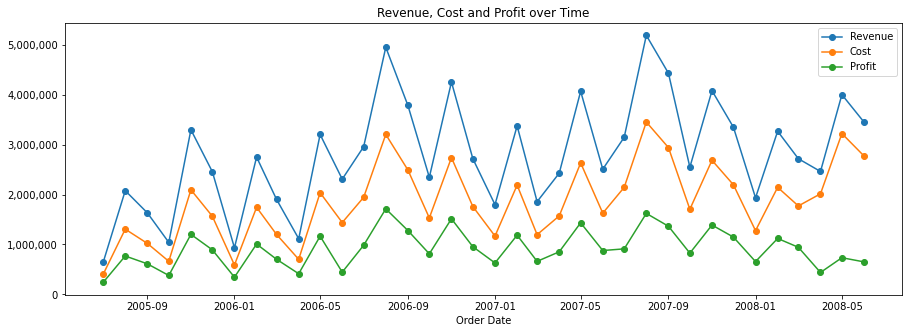

In [17]:
#compare Revenue, Cost and Profit over time
fig, ax = plt.subplots(figsize=(15,5))

plotline(df_sales_by_date, 'order_date', 'line_revenue', 'Revenue')
plotline(df_sales_by_date, 'order_date', 'line_total_cost', 'Cost')
plotline(df_sales_by_date, 'order_date', 'line_profit', 'Profit')


plot_axis_as_thousand()
set_chart_details("Revenue, Cost and Profit over Time", 'Order Date', '')



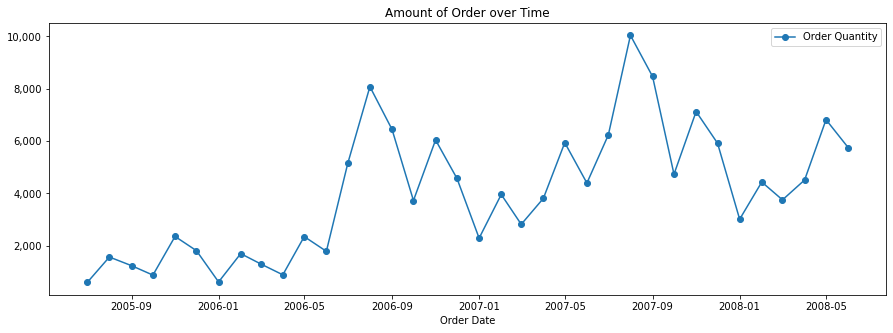

In [18]:
#compare order quantity over time
fig, ax = plt.subplots(figsize=(15,5))

plotline(df_sales_by_date, 'order_date', 'OrderQty', 'Order Quantity')


plot_axis_as_thousand()
set_chart_details('Amount of Order over Time', 'Order Date', '')


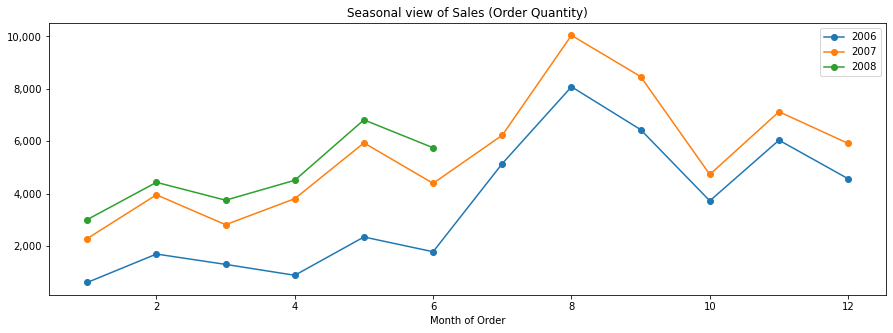

In [19]:
#visualise oder quantity to see seasonality

fig, ax = plt.subplots(figsize=(15,5))

plotline(df_sales_by_date[(df_sales_by_date['order_date_year'] == 2006)], 'order_date_month', 'OrderQty', '2006')
plotline(df_sales_by_date[(df_sales_by_date['order_date_year'] == 2007)], 'order_date_month', 'OrderQty','2007')
plotline(df_sales_by_date[(df_sales_by_date['order_date_year'] == 2008)], 'order_date_month', 'OrderQty', '2008')

plot_axis_as_thousand()
set_chart_details('Seasonal view of Sales (Order Quantity)', 'Month of Order', '')


## 9. Visualize performance indicators for cost over time

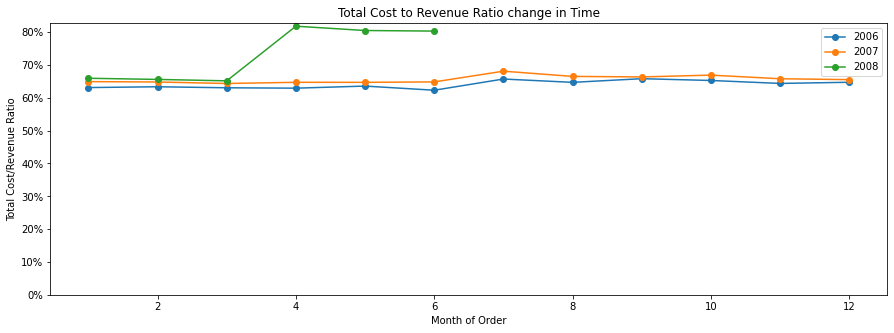

In [20]:
#compare total cost/revenue ratio for each year for seasonality

fig, ax = plt.subplots(figsize=(15,5))

plotline(df_sales_by_date[(df_sales_by_date['order_date_year'] == 2006)], 'order_date_month', 'total_cost_revenue_ratio', '2006')
plotline(df_sales_by_date[(df_sales_by_date['order_date_year'] == 2007)], 'order_date_month', 'total_cost_revenue_ratio', '2007')
plotline(df_sales_by_date[(df_sales_by_date['order_date_year'] == 2008)], 'order_date_month', 'total_cost_revenue_ratio', '2008')


plot_axis_as_percent()
set_chart_details('Total Cost to Revenue Ratio change in Time',  'Month of Order','Total Cost/Revenue Ratio',)


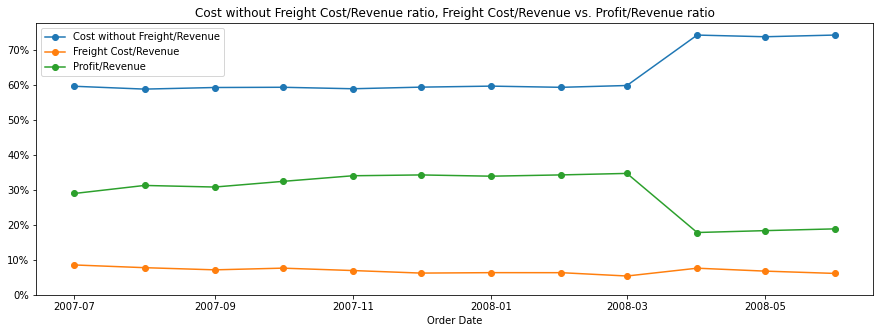

'cost_no_freight_revenue_ratio'

In [21]:
#visualise cost/revenue ratios to see the deviations
fig, ax = plt.subplots(figsize=(15,5))

# plotline(df_sales_by_date[df_sales_by_date['order_date'] > datetime.date(2007,6,1)], 'order_date', 'line_revenue', 'Revenue')
plotline(df_sales_by_date[df_sales_by_date['order_date'] > datetime.date(2007,6,1)], 'order_date', 'cost_no_freight_revenue_ratio', 'Cost without Freight/Revenue')
plotline(df_sales_by_date[df_sales_by_date['order_date'] > datetime.date(2007,6,1)], 'order_date', 'freight_cost_revenue_ratio', 'Freight Cost/Revenue')
plotline(df_sales_by_date[df_sales_by_date['order_date'] > datetime.date(2007,6,1)], 'order_date', 'line_profit_revenue_ratio', 'Profit/Revenue')

plot_axis_as_percent()
set_chart_details('Cost without Freight Cost/Revenue ratio, Freight Cost/Revenue vs. Profit/Revenue ratio', 'Order Date', '')

'cost_no_freight_revenue_ratio'


## 10. Compare the deviation in revenue, cost and profit for March and April 2008 and 

In [22]:
#compare the cost difference in March 2008 and and April 2008
#filter the data for March and April 2008
df_sales_2008_march_april = df_sales_data[((df_sales_data['order_date_year'] == 2008) &
              ((df_sales_data['order_date_month'] == 3) | (df_sales_data['order_date_month'] == 4)))]
                

In [23]:
#calculate revenue, cost, profit etc. per Product Category
df_sales_march_april = df_sales_2008_march_april.groupby(by= ['order_date', 'order_date_year', 'order_date_month', 'Product_Category'])[[
    'line_profit','line_revenue', 'line_cost_no_freight','line_freight_cost',
    'line_total_cost','line_discount']].sum().sort_values(by = ['order_date'],ascending = True).reset_index()

In [24]:
#create performance indicator ratios
ratios(df_sales_march_april)
#format the field values for a more readable display
format_table(df_sales_march_april)

,order_date,order_date_year,order_date_month,Product_Category,line_profit,line_revenue,line_cost_no_freight,line_freight_cost,line_total_cost,line_discount,line_profit_revenue_ratio,total_cost_revenue_ratio,cost_no_freight_revenue_ratio,freight_cost_revenue_ratio,cost_no_freight_total_cost_ratio,freight_total_cost_ratio,line_discount_ratio
0,2008-03-01,2008,3,Accessories,-750,"15,450",5778.202100,"10,420","16,198",2,-5%,105%,37%,67%,36%,64%,0%
1,2008-03-01,2008,3,Bikes,"880,110","2,435,789",1475296.198600,"77,171","1,552,467","3,212",36%,64%,61%,3%,95%,5%,0%
2,2008-03-01,2008,3,Clothing,"-9,152","49,334",25389.810200,"32,754","58,144",343,-19%,118%,51%,66%,44%,56%,1%
3,2008-03-01,2008,3,Components,"73,837","220,872",121237.703000,"25,797","147,035",0,33%,67%,55%,12%,82%,18%,0%
4,2008-04-01,2008,4,Accessories,"-8,575","30,026",14037.395500,"24,142","38,180",422,-29%,127%,47%,80%,37%,63%,1%
5,2008-04-01,2008,4,Bikes,"422,919","2,052,940",1548429.011625,"74,474","1,622,903","7,118",21%,79%,75%,4%,95%,5%,0%
6,2008-04-01,2008,4,Clothing,"-30,539","72,364",48808.540750,"52,370","101,178","1,725",-42%,140%,67%,72%,48%,52%,2%
7,2008-04-01,2008,4,Components,"55,058","310,268",218758.142250,"36,451","255,210",0,18%,82%,71%,12%,86%,14%,0%


## 11. Visulaize the revenue, cost and profit differences in four big categories with pandas data frame pivot table

In [25]:
# create dataframe for march and april sales
pivot_sales_march_april = pd.pivot_table(df_sales_march_april , values= ['line_revenue', 'line_total_cost','line_profit'], index=['Product_Category'],
                    columns=['order_date'], aggfunc=numpy.sum, fill_value=0)
pivot_sales_march_april.style.format('{0:,.0f}')

In [26]:
# create seperate dataframe for march and april sales to calculate the change
pivot_sales_march = pd.pivot_table(df_sales_march_april[df_sales_march_april['order_date_month'] == 3] , values= ['line_revenue', 'line_total_cost','line_profit'], index=['Product_Category'],
                    columns=[], aggfunc=numpy.sum, fill_value=0)

pivot_sales_april = pd.pivot_table(df_sales_march_april[df_sales_march_april['order_date_month'] == 4] , values= ['line_revenue', 'line_total_cost','line_profit'], index=['Product_Category'],
                    columns=[], aggfunc=numpy.sum, fill_value=0)


In [27]:
# create dataframe to display the change from March to April
pivot_change_march_april = ((pivot_sales_april-pivot_sales_march)/(numpy.abs(pivot_sales_march)))
pivot_change_march_april.style.format('{0:,.0%}')

,line_profit,line_revenue,line_total_cost
Product_Category,,,
Accessories,"-1,044%",94%,136%
Bikes,-52%,-16%,5%
Clothing,-234%,47%,74%
Components,-25%,40%,74%


## 12. Visulaize the revenue, cost and profit differences in Bikes category with pandas data frame pivot table

In [28]:
#calculate revenue, cost, profit etc. per order date
df_sales_temp = df_sales_2008_march_april.groupby(by= ['order_date', 'order_date_year', 'order_date_month', 'Product_Category','Product_Sub_Category', 'Sales_Person', 'Sales_Region', 'Sales_Province', 'Sales_City', 'Product_Name'])[[
    'line_profit','line_revenue', 'line_cost_no_freight','line_freight_cost',
    'line_total_cost','line_discount']].sum().sort_values(by = ['order_date'],ascending = True).reset_index()
df_sales_bikes = df_sales_temp[df_sales_temp['Product_Category'] == 'Bikes']

In [29]:
# create dataframe for march and april bikes sales

pivot_bikes = pd.pivot_table(df_sales_bikes , values= ['line_revenue', 'line_total_cost','line_profit'], index=['Product_Sub_Category'],
                    columns=['order_date'], aggfunc=numpy.sum, fill_value=0)
pivot_bikes.style.format('{0:,.0f}')

In [30]:
# create seperate dataframe for march and april bikes sales to calculate the change

pivot_bikes_march = pd.pivot_table(df_sales_bikes[(df_sales_bikes['order_date_month'] == 3)  ] , values= ['line_revenue', 'line_total_cost','line_profit'], index=['Product_Sub_Category'],
                    columns=[], aggfunc=numpy.sum, fill_value=0)

pivot_bikes_april = pd.pivot_table(df_sales_bikes[(df_sales_bikes['order_date_month'] == 4) ] , values= ['line_revenue', 'line_total_cost','line_profit'], index=['Product_Sub_Category'],
                    columns=[], aggfunc=numpy.sum, fill_value=0)


In [31]:
# create dataframe to display the change in Bikes sales from March to April

pivot_change_bikes = ((pivot_bikes_april-pivot_bikes_march)/(numpy.abs(pivot_bikes_march)))
pivot_change_bikes.style.format('{0:,.0%}')

,line_profit,line_revenue,line_total_cost
Product_Sub_Category,,,
Mountain Bikes,-37%,-4%,19%
Road Bikes,-50%,-7%,15%
Touring Bikes,-66%,-31%,-13%
